## Import Modules

In [1]:
import os
from IPython.display import clear_output
import torch
print('cuda available: '+ str(torch.cuda.is_available()))

from models_avm import NestedUNet
from loss_fun_avm import compute_per_channel_dice
from tra_val_avm import inference_out
from data_loader_avm import Dataset_out

cuda available: True


## Data Path

In [2]:
# Define data list here
# The files for only segmentation inference should be those slices with the bAVM.

path_tra1 = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forUNetpp\1_tra\1' #mod
list_tra1 = os.listdir(path_tra1)
for i in range(len(list_tra1)):
    list_tra1[i] = path_tra1+'/'+list_tra1[i]
    
list_tra = list_tra1
    
path_val1 = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forUNetpp\2_val\1' #mod
list_val1 = os.listdir(path_val1)
for i in range(len(list_val1)):
    list_val1[i] = path_val1+'/'+list_val1[i]
    
list_val = list_val1

path_ts1 = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forUNetpp\3_ts\1' #mod
list_ts1 = os.listdir(path_ts1)
for i in range(len(list_ts1)):
    list_ts1[i] = path_ts1+'/'+list_ts1[i]
    
list_ts = list_ts1

path_tra_lab_txt = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forYOLOv5\labels\1_tra' #mod
path_val_lab_txt = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forYOLOv5\labels\2_val' #mod
path_ts_lab_txt = r'E:\AVM_Project_TCVGH\Datasets\prc\6_Datasets_for_model_fin2D\forYOLOv5\labels\3_ts' #mod

## Initialize Model and load trained weights

In [3]:
# call model cuda for gpu
#model = UNet(norm_method='group').cuda()
model = NestedUNet(norm_method='group').cuda() #mod

# load trained model
PATH = r'C:\Users\USER\Desktop\Segmentation\Models\unetpp\Models\Seg_dia10\train\exp1\best_val.tar' #mod
own_state = torch.load(PATH)
model.load_state_dict(own_state)
model.eval();

# score function
score = [compute_per_channel_dice]

## Start to Output

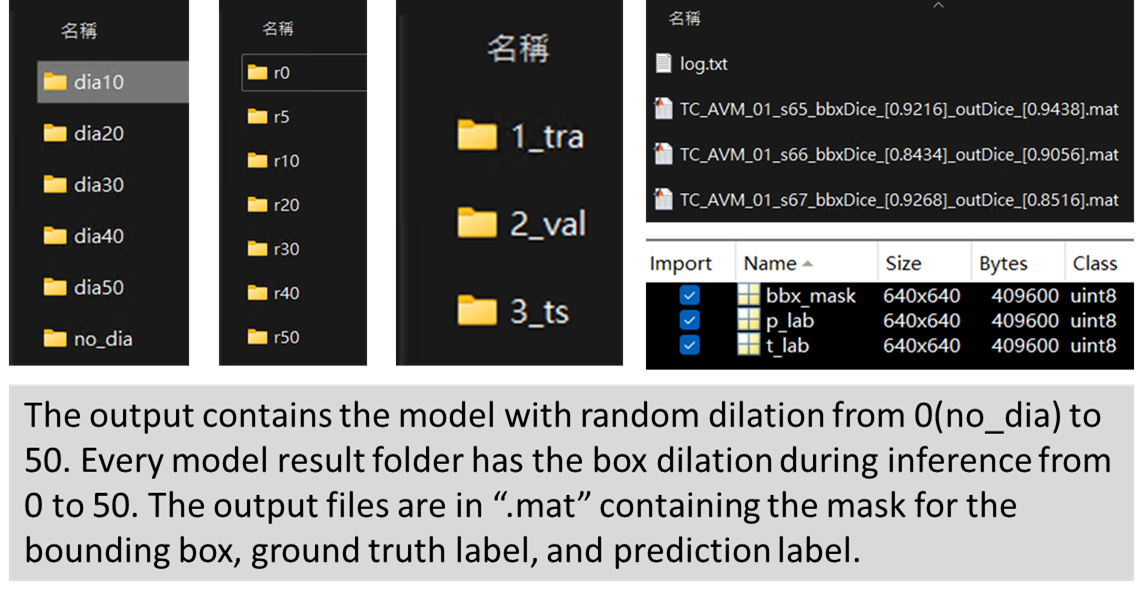

In [5]:
# Log and results saving directory
path = r'C:\Users\USER\Desktop\Segmentation\Results\1_Results_unet\dia10' #mod

dia_factor = [0,5,10,20,30,40,50]

#i = 0
for i in range(len(dia_factor)):
    # Data loader
    tra_data = Dataset_out(list_tra,path_tra_lab_txt,dia_factor[i])
    tra_loader_out = torch.utils.data.DataLoader(
        dataset = tra_data,           
        batch_size = 1,                 
        shuffle = False)
    val_data = Dataset_out(list_val,path_val_lab_txt,dia_factor[i])
    val_loader_out = torch.utils.data.DataLoader(
        dataset = val_data,           
        batch_size = 1,                 
        shuffle = False)
    ts_data = Dataset_out(list_ts,path_ts_lab_txt,dia_factor[i])
    ts_loader_out = torch.utils.data.DataLoader(
        dataset = ts_data,           
        batch_size = 1,                 
        shuffle = False)

    path_sav_tra = path+'\\r'+str(dia_factor[i])+'\\1_tra'
    if os.path.isdir(path_sav_tra)==False:
        os.mkdir(path_sav_tra)
    path_sav_val = path+'\\r'+str(dia_factor[i])+'\\2_val'
    if os.path.isdir(path_sav_val)==False:
        os.mkdir(path_sav_val)
    path_sav_ts = path+'\\r'+str(dia_factor[i])+'\\3_ts'
    if os.path.isdir(path_sav_ts)==False:
        os.mkdir(path_sav_ts)

    inference_out(path_sav_tra,model,score,tra_loader_out)
    inference_out(path_sav_val,model,score,val_loader_out)
    inference_out(path_sav_ts,model,score,ts_loader_out)


    clear_output(wait=True)

|   100/ 3476 batches | ms/batch 7854.00 | 
|   200/ 3476 batches | ms/batch 7803.00 | 
|   300/ 3476 batches | ms/batch 6872.00 | 
|   400/ 3476 batches | ms/batch 7370.00 | 
|   500/ 3476 batches | ms/batch 7153.59 | 
|   600/ 3476 batches | ms/batch 8028.00 | 
|   700/ 3476 batches | ms/batch 9250.00 | 
|   800/ 3476 batches | ms/batch 9120.00 | 
|   900/ 3476 batches | ms/batch 6818.00 | 
|  1000/ 3476 batches | ms/batch 5930.00 | 
|  1100/ 3476 batches | ms/batch 8008.00 | 
|  1200/ 3476 batches | ms/batch 6846.00 | 
|  1300/ 3476 batches | ms/batch 7402.10 | 
|  1400/ 3476 batches | ms/batch 7897.00 | 
|  1500/ 3476 batches | ms/batch 6365.00 | 
|  1600/ 3476 batches | ms/batch 8405.00 | 
|  1700/ 3476 batches | ms/batch 7527.00 | 
|  1800/ 3476 batches | ms/batch 7019.00 | 
|  1900/ 3476 batches | ms/batch 6136.00 | 
|  2000/ 3476 batches | ms/batch 9316.00 | 
|  2100/ 3476 batches | ms/batch 7119.56 | 
|  2200/ 3476 batches | ms/batch 7797.00 | 
|  2300/ 3476 batches | ms/batch

# Log ^